# Project 4: West Nile Virus Prediction

Notebook 1 of 5

**Contents:**

- [Introduction/ Background](##Introduction/Background)
- [Problem Statement](##Problem_Statement)
- [Objective](##Objective)
- [Datasets/ Data Dictionary](##Datasets)
- [Data Cleaning](##Data_Cleaning)

## Introduction/ Background

The West Nile Virus (WNV) has been a worrying disease for the United States since 1999. The [CDC](https://www.cdc.gov/westnile/index.html) has acknowledged it as the leading cause of mosquito-borne disease feeding on infected birds [(*source*)](https://parasitesandvectors.biomedcentral.com/articles/10.1186/1756-3305-3-19#citeas) in the continental United States. Now, there are still no vaccines to prevent or medications to cure WNV patients -- statistics data from the CDC, West Nile fever (WNF) is a potentially serious illness for humans and approximately 1 in 150 infected people develop a serious illness with symptoms that might last for several weeks. Up to 1/5 of patients have milder symptoms and approximately 4/5 show no symptoms at all [(*source*)](http://www.cdc.gov/westnile/faq/genQuestions.html).

In Illinois, [West Nile virus was first identified in September 2001](https://www.dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus) when laboratory tests confirmed its presence in two dead crows found in the Chicago area. The following year, the state's first human case and death from West Nile disease were recorded and all but two of the state's 102 counties eventually reported a positive human, bird, mosquito or horse. By the end of 2002, Illinois had counted more human cases (884) and deaths (64) than any other state in the United States.

Since then, Illinois and more specifically Chicago, has continued to suffer from multiple outbreaks of the WNV. From 2005 to 2016, a total of 1,371 human WNV cases were [reported](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227160) within Illinois. Out of these total reported cases, 906 cases (66%) were from the Chicago region (Cook and DuPage Counties). 

## Problem Statement
Being hired by the division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE), with the above in mind, <b>our project aims at predicting outbreaks of the WNV</b>. This helps the City of Chicago and the Chicago Department of Public Health (CDPH) to allocate resources more efficiently and effectively toward preventing the transmission of this potentially deadly virus. Specifically, our model will use a combination of weather, time, and location feature to predict the presence of WNV within mosquito traps set up throughout Chicago. 

<b> Our project also aims to determine the best strategy for controlling the spread of the WNV</b>, as well as <b>discussing and justifying the various trade-offs that need to be made in implementing our model</b>.

*Key Questions*:
1. Which species of mosquito is(are) the key carrier of WNV?  
1. What are the keys factors from weather that lead to high positive WNV cases? Temperature? Season? Condition? Precipitation Total? 
1. How has higher temperature affected the mosquito infection rate then human cases of WNV? 
1. What is the prediction of WNV outbreaks/ presence based on the parameters given?
1. Which area in Chicago has the most positive WNV?
1. Where shall the spraying effort focus on? or reinforce?
1. At what point, the cost and benefit of the spraying program will break even?


## Objective
This is a supervised learning task, since the labels are provided (the expected output, i.e., binary representation of whether WNV was present within mosquito traps). 

We will be predicting two discrete class labels. More specifically, this is a binary classification problem with the ultimate goal -- to build a classifier to distinguish between just two classes, whether WNV was present in these mosquitos. 1 means WNV is present, and 0 means not present.

We will evaluate the performance of our model using AUC (Area Under Curve) score as the North Star metric. AUC score can be obtained by measuring the area under the receiver operating characteristic(ROC) curve. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR).  Our motivation is to increase the correct prediction (TP, TN) out of all the prediction, to detect correctly. The closer the AUC score to 1, the better the model is performing. 

## Datasets

- `train.csv` : the training set consists of data from 2007, 2009, 2011, and 2013.
- `test.csv`  : the test set is used to predict the test results for 2008, 2010, 2012, and 2014.
- `weather.csv`: weather data from 2007 to 2014.
- `spray.csv` : GIS data of spraying efforts in 2011 and 2013

Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort.

<u>`train` & `test` dataset </u>

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. The location of the traps are described by the block number and street name. These attributes have been mapped into Longitude and Latitude in the dataset and are derived locations. For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL", which translates to (41.974089,-87.824812) on the map.

Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. Not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time.

<u>`spray` dataset</u>

The City of Chicago also does spraying to kill mosquitos. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus.

<u>`weather` dataset</u>

It is believed that hot and dry conditions after wetter condition are more favorable for West Nile virus than cold and wet. The dataset is from National Oceanic and Atmospheric Administration (NOAA) of the weather conditions of 2007 to 2014, during the months of the tests.

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

## Data Dictionary

| **Columns** | **Type** | **Dataset** | **Description** |
|---|---|---|---|
| **Id** | *integer* | test | The id of the record |
| **Date** | *datetime* | train/ test | Date that the WNV test is performed (YYYY-MM-DD) |
| **Address** | *object* | train/ test | Approximate address of the location of trap. This is used to send to the GeoCoder. | 
| **Species** | *object* | train/ test | The species of mosquitos |
| **Block** | *integer* | train/ test | Block number of address | 
| **Street** | *object* | train/ test | Street name |
| **Trap** | *object* | train/ test | Id of the trap |
| **AddressNumberAndStreet** | *object* | train/ test | Approximate address returned from GeoCoder |
| **Latitude, Longitude** | *float* | train/ test | Latitude and Longitude returned from GeoCoder |
| **AddressAccuracy** | *integer* | train/ test | Accuracy returned from GeoCoder |
| **NumMosquitos** | *integer* | train/ test | Number of mosquitoes caught in this trap |
| **WnvPresent** | *integer* | train/ test | Whether West Nile Virus was present in these mosquitos. (1 means WNV is present, while 0 means WNV is absent.) 
| **Date** | *datetime* | spray | The date of the spray (YYYY-MM-DD) |
| **Time** | *object* | spray | The time of the spray |
| **Latitude, Longitude** | *float* | spray | The Latitude and Longitude of the spray |
| **Station** | *integer* | weather | Weather station (1 or 2) |
| **Date** | *datetime* | weather | Date of measurement (YYYY-MM-DD)|
| **Tmax** | *integer* | weather | Maximum daily temperature (in Degrees Fahrenheit, F) |
| **Tmin** | *integer* | weather | Minimum daily temperature (in Degrees Fahrenheit, F) |
| **Tavg** | *object* | weather | Average daily temperature (in Degrees Fahrenheit, F) |
| **Depart** | *object* | weather | Departure from normal temperature (in Degrees Fahrenheit, F) |
| **DewPoint** | *integer* | weather | Average Dew Point temperature (in Degrees Fahrenheit, F) |
| **WetBulb** | *object* | weather | Average Wet Bulb temperature (in Degrees Fahrenheit, F) |
| **Heat** | *object* | weather | Heating Degree Days (season begins with July) |
| **Cool** | *object* | weather | Cooling Degree Days (season begins with January) |
| **Sunrise** | *object* | weather | Time of sunrise (calculated) |
| **Sunset** | *object* | weather | Time of sunset (calculated) |
| **CodeSum** | *object* | weather | Code of significant weather phenomena |
| **Depth** | *object* | weather | Snow/ice depth on the ground in inches, measured at 1200 UTC |
| **Water1** | *object* | weather | Water equivalent in inches, measured at 1800 UTC |
| **SnowFall** | *object* | weather | Total snowfall precipitation for the day (in inches and tenths) |
| **PrecipTotal** | *object* | weather | Total water equivalent precipitation for the day (in inches and tenths).  |
| **StnPressure** | *object* | weather | Average station pressure (in inches of hg) |
| **SeaLevel** | *object* | weather | Average sea level pressure (in inches of hg) |
| **ResultSpeed** | *float* | weather | Resultant wind speed (mph) |
| **ResultDir** | *integer* | weather | Resultant wind direction (degrees) |
| **AvgSpeed** | *object* | weather | Average wind speed (mph) |

More detailed descriptions for weather data can be found in [noaa_weather_qclcd_documentation]('./assets/noaa_weather_qclcd_documentation.pdf').

## Data Cleaning

In [1]:
# !pip install shapely

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import shapely
from shapely import geometry
from shapely import ops
from shapely.geometry import Point, LineString, Polygon, MultiPoint
from shapely.ops import nearest_points

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load datasets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
weather = pd.read_csv('./datasets/weather.csv')
spray = pd.read_csv('./datasets/spray.csv')

In [4]:
datasets = [(train, 'train'),
            (spray, 'spray'),
            (weather, 'weather')]

## Weather
According to the documentation provided for the weather dataset, if a value is missing or unavailable, it is replaced with either of these terms:
*['M', '-']*

We'll create a function that helps us to view summaries of our datasets.

In [5]:
def df_summary(df, df_name):
    """
    Summaries for all the variables in the dataset
    """
    print(df_name, 'dataset')
    print()
    
    # print shape 
    print(df.shape)
    print()
    
    # check for non-null and dtype information
    print("Non-null and Data Types")
    df.info()
    print()
    
    # check for duplicated rows
    print(f'Number of duplicated rows: {df[df.duplicated(keep=False)].shape[0]}')
    # check for any missing values, null or 'M' or '-'
    print(f"Number of missing values: {df.isin([np.nan, 'M', '-']).sum().sum()}")
    # check for any zero values
    print(f"Number of zero values: {df.isin(['0.0','0']).sum().sum()}")
    print()    
    
    # print columns with missing values, nan/ 'M'/ '-'
    print("Columns with missing values:")
    print(df.isin([np.nan,'M','-']).sum()[df.isin([np.nan,'M','-']).sum() > 0].sort_values(ascending=False))
    print()
    
    # print coumns with zero values
    print("Columns with zero values:")
    print(df.isin(['0.0', '0']).sum()[df.isin(['0.0', '0']).sum() > 0])
    print()
    
    print("______________________________________________________\n")

### Initial Analysis

In [6]:
df_summary(weather, 'weather')

weather dataset

(2944, 22)

Non-null and Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 


In [7]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [8]:
# Some 'T' or trace values
weather.isin(['  T']).sum()[weather.isin(['  T']).sum() > 0]

SnowFall        12
PrecipTotal    318
dtype: int64

### Summary and Cleaning to be done 

<u>**Summary:**
    
**Weather:**
- There are missing values in the following attributes: Tavg , Depart, WetBulb, Heat, Cool, Sunrise, Sunset, Depth, Water1, SnowFall, PrecipTotal, StnPressure, SeaLevel, and AvgSpeed.
- Tavg attribute has 11 missing values.
- Depart attribute has 1,472 missing values.
- WetBulb attribute has 4 missing values.
- Heat attribute has 11 missing values.
- Cool attribute has 11 missing values.
- Sunrise attribute has 1,472 missing values.
- Sunset attribute has 1,472 missing values.
- Depth attribute has 1,472 missing values.
- Water1 attribute has 2,944 missing values.
- SnowFall attribute has 1,472 missing values.
- PrecipTotal attribute has 2 missing values.
- StnPressure attribute has 4 missing values.
- SeaLevel attribute has 9 missing values.
- AvgSpeed attribute has 3 missing values.
- There are zero values in the following attributes: Heat, Depth, and Snowfall.
- Heat attribute has 1,870 zero values.
- Depth attribute has 1,472 zero values.
- Snowfall attribute has 1,459 zero values.

<u>**Cleaning to be done:**

**Weather:**

- Impute missing values for daily average temperature `Tavg` with average of `Tmax` and `Tmin`
- Calculate missing values for `Cool` and `Heat` with `Tavg`
- Calculate missing `Depart` from Station 2 with 30 year normal temperature based on Station 1 readings and Station 2 `Tavg`.
- Impute missing values for `WetBulb`, `PrecipTotal`, `StnPressure`, `SeaLevel`, `AvgSpeed` using readings of Station with non-missing value.
- Impute 'T' or trace values as 0.01.
- Impute `Sunrise` and `Sunset` for Station 2 with Station 1 values
- Split and recombine `CodeSum` to create proper spacing between different codes
- Create new feature counting number of exceptional weather phenomena based on `CodeSum`
- Create more interpretable features like `rain` and `lowvis` based on `CodeSum`
- Change `Date` from string object to `datetime64`
- Drop `Water1`, `Depth`, `SnowFall` due to high missing values (>99.5% 'M' or 0)
- Transform all features into float values
- Merge Station 1 and Station 2 by averaging values of each station
- Add Year, Month, Week and Day of Week features


### Imputing / Dropping Features

In [9]:
# Drop columns due to high missing values (>99.5% 'M' or 0)
weather = weather.drop(columns=['Water1', 'Depth', 'SnowFall'])

In [10]:
# Function to impute Average Temperature, Cooling and Heating Degrees
def impute_tavg_heat_cool(row):
    # Impute missing values for Tavg
    if row['Tavg'] == 'M':
    # averaging Tmax and Tmin, then round up to the nearest whole number
        row['Tavg'] = round((row['Tmax'] + row['Tmin']) / 2) 
        
    # Impute missing values for Cool and Heat by the difference of 65 F
    # if Tavg is above 65°F, we subtract 65 from the mean and the result is Cooling Degree Days
    # if Tavg is below 65°F, we subtract the mean from 65 and the result is Heating Degree Days
    if row['Cool'] == 'M' or row['Heat'] == 'M':
        if row['Tavg'] > 65: 
            row['Cool'] = row['Tavg'] - 65
            row['Heat'] = 0
        elif row['Tavg'] < 65:
            row['Cool'] = 0
            row['Heat'] = 65 - row['Tavg'] 
        else:
            row['Cool'] = row['Heat'] = 0
    return row

In [11]:
# Impute the valeus for Tavg, Cool, Heat 
weather = weather.apply(impute_tavg_heat_cool, axis=1)

Based on the initial analysis done so far, we're suspecting that Station 2 does not have any information in `Depart`, `Sunrise`, and `Sunset` attributes.

Let's verify this:

In [12]:
station1 = weather[weather['Station'] == 1]

print("Non-zero Percentage (%) of missing values in Station 1:\n")
print(round(station1.isin([np.nan, 'M', '-']).sum()[station1.isin([np.nan, 'M', '-']).sum() > 0]/ len(station1) * 100, 2))

Non-zero Percentage (%) of missing values in Station 1:

WetBulb        0.20
StnPressure    0.14
SeaLevel       0.34
dtype: float64


In [13]:
station2 = weather[weather['Station'] == 2]

print("Non-zero Percentage (%) of missing values in Station 2:\n")
print(round(station2.isin([np.nan, 'M', '-']).sum()[station2.isin([np.nan, 'M', '-']).sum() > 0]/ len(station2) * 100, 2))

Non-zero Percentage (%) of missing values in Station 2:

Depart         100.00
WetBulb          0.07
Sunrise        100.00
Sunset         100.00
PrecipTotal      0.14
StnPressure      0.14
SeaLevel         0.27
AvgSpeed         0.20
dtype: float64


It seems that `Depart`, `Sunrise`, and `Sunset` values are not normally reported or available for Station 2.

We'll create a function to impute `Depart` values from Station 1's readings to Station 2's readings.

For temperature and precipitation, the 30-year normal weather values are an accepted standard, but we also wanted to consider the specific differences and possible warmer trends of the more recent years in question. [*(source)*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2856545/)

In [14]:
# Function to extract 30-year normal temperature from station 1's readings 
def create_normal(df):
    if df['Station'] == 1:
        df['Normal'] = int(df['Tavg']) - int(df['Depart'])
    return df

# Apply 30 year temperature to station 2's readings 
def apply_normal(df):
    if df['Station'] == 2:
        df['Normal'] = weather[(weather['Date'] == df['Date']) & (weather['Station'] == 1)]['Normal'].values[0]
    return df

In [15]:
weather = weather.apply(create_normal, axis=1)
weather = weather.apply(apply_normal, axis=1)

In [16]:
weather.head()

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,Normal,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
0,9.2,,2,2007-05-01,14,51,0,53.0,0.00,27,1.7,29.82,1,29.10,0448,1849,67,83,50,56
1,9.6,,3,2007-05-01,M,51,0,53.0,0.00,25,2.7,29.82,2,29.18,-,-,68,84,52,57
2,13.4,BR,0,2007-05-02,-3,42,14,54.0,0.00,4,13.0,30.09,1,29.38,0447,1850,51,59,42,47
3,13.4,BR HZ,0,2007-05-02,M,42,13,54.0,0.00,2,13.3,30.08,2,29.44,-,-,52,60,43,47
4,11.9,,0,2007-05-03,2,40,9,54.0,0.00,7,11.7,30.12,1,29.39,0446,1851,56,66,46,48


In [17]:
# Rearrange columns
weather = weather[['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Normal', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed']]

In [18]:
# Remaining 'M' values
weather.isin(['M']).sum()[weather.isin(['M']).sum() > 0]

Depart         1472
WetBulb           4
PrecipTotal       2
StnPressure       4
SeaLevel          9
AvgSpeed          3
dtype: int64

### Impute the 'M' missing values in remaining Depart, WetBulb, PrecipTotal, StnPressure, SeaLevel, AvgSpeed

In [19]:
# Impute the 'M' missing values in remaining Depart, WetBulb, PrecipTotal, StnPressure, SeaLevel, AvgSpeed
def impute_remaining(df):
    replace_dict = {}
    for index in df.index:
        if df[index] == 'M':
            replace_dict[index] = 'M'
    if replace_dict:
        #  recall the formula to calculate depart by subtracting normal from avearge temperature
        if 'Depart' in replace_dict:
            df['Depart'] = int(df['Tavg']) - int(df['Normal'])
            del replace_dict['Depart']
            
        for key, value in replace_dict.items():
            # Retrieve from Station 1 if Station 2 is 'M' and vice versa
            if df['Station'] == 2:
                df[key] = weather[(weather['Date'] == df['Date']) & (weather['Station'] == 1)][key].values[0]
            else:
                df[key] = weather[(weather['Date'] == df['Date']) & (weather['Station'] == 2)][key].values[0]
                
    return df

In [20]:
weather = weather.apply(impute_remaining, axis=1)

In [21]:
# Check remaining 'M' values
weather.isin(['M']).sum()[weather.isin(['M']).sum() > 0]

StnPressure    2
dtype: int64

In [22]:
# Function above didn't work as both station 1 and 2 have a missing value for StnPressure
weather[weather['StnPressure'] == 'M']

,Station,Date,Tmax,Tmin,Tavg,Normal,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2410,1,2013-08-10,81,64,73,73.0,0,57,63,0,8,0454,1900,,0.00,M,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,73.0,2,55,63,0,10,-,-,,0.00,M,30.07,6.0,6,7.4


In [23]:
# Impute according to the StnPressure of the day after
weather.at[2410, 'StnPressure'] = weather[weather['Date'] == '2013-08-11']['StnPressure'].values[0]
weather.at[2411, 'StnPressure'] = weather[weather['Date'] == '2013-08-11']['StnPressure'].values[1]

In [24]:
# check the result
print("Row 2410 and 2411")
display(weather.iloc[2410:2412])

Row 2410 and 2411


,Station,Date,Tmax,Tmin,Tavg,Normal,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2410,1,2013-08-10,81,64,73,73.0,0,57,63,0,8,0454,1900,,0.00,29.35,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,73.0,2,55,63,0,10,-,-,,0.00,29.42,30.07,6.0,6,7.4


For the above five columns with missing values (except 'Depart'), we could also impute the missing values using multiple imputation method. Scikit-Learn provides a handy class to take care of missing values: IterativeImputer().

The IterativeImputer performs multiple regressions on random samples of the data and aggregates for imputing the missing values.

In [25]:
# # create a function to impute the remaining columns with missing values
# def impute_missing_values(df, missing_cols):
    
#     ## Applying multiple imputation for missing numerical values
#     # Initialize IterativeImputer
#     imp = IterativeImputer(random_state=123)

#     # Copy df to imp_df_numeric_missing
#     imp_df_numeric_missing = df.copy(deep=True)

#     # Impute using fit_tranform on the missing_cols of the dataframe
#     imp_df_numeric_missing[missing_cols] = np.round(imp.fit_transform(df[missing_cols]),2)
    
#     return imp_df_numeric_missing

# # get the missing columns' name
# missing_cols = list(weather_df.isnull().sum()[weather_df.isnull().sum() > 0].index)

# # impute the missing values
# weather_df = impute_missing_values(weather_df, missing_cols)


### Impute the 'T' trace values in PrecipTotal

In [26]:
# Changing trace ('T' or '  T') to 0.01
# When it comes to liquid precipitation (rainfall), meteorologists don't measure anything under 0.01 inch (one hundredth of an inch)
weather['PrecipTotal'] = weather['PrecipTotal'].apply(lambda x: 0.01 if 'T' in x else x)

### Impute missing values in Sunset & Sunrise

In [27]:
# Impute sunrise/sunset
def impute_sun(df):
    if df['Station'] == 2:
        df['Sunrise'] = weather[(weather['Date'] == df['Date']) & (weather['Station'] == 1)]['Sunrise'].values[0]
        df['Sunset'] = weather[(weather['Date'] == df['Date']) & (weather['Station'] == 1)]['Sunset'].values[0]
    return df

In [28]:
weather = weather.apply(impute_sun, axis=1)

In [29]:
# get sample rows with missing values
sample_incomplete_rows = weather[weather.isin(['M', np.nan]).any(axis=1)].head()
display(sample_incomplete_rows)

,Station,Date,Tmax,Tmin,Tavg,Normal,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


There is no incomplete rows in dataset.

### Features Correction

It seems that multiple weather types can be observed in a day. We can see that some of the `Codes` are combined together. 
The `CodeSum` feature is slightly tricky to deal with -- there's a variety of ways we could take this forward, including one-hot encoding of each weather code. However, a number of codes are extremely rare or don't exist within our data. We're dealing with this by combining weather codes into several features that include snow, rain, windy or low visibility (fog/mist) conditions. 

In [30]:
# Ensuring that each code has proper spacing
codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL',
         'IC', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS',
         'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR',
         'BC', 'BL', 'VC']
weather['CodeSum'] = weather['CodeSum'].apply(lambda x: ' '.join([t for t in x.split(' ') if t in codes]))

In [31]:
weather['CodeSum'].unique()

array(['', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'RA HZ', 'RA BR HZ',
       'BR HZ FU', 'RA HZ FU', 'TS RA BR HZ', 'DZ BR', 'TS BR HZ',
       'RA DZ BR HZ', 'TS RA BR', 'TS RA', 'TS BR', 'RA DZ FG+ BR',
       'RA FG+ BR', 'RA DZ', 'RA DZ BR', 'TS RA HZ', 'RA FG+ FG BR',
       'DZ FG+ FG BR HZ', 'RA BR SQ', 'TS', 'FG+ BR HZ', 'RA SN',
       'DZ BR HZ', 'RA BR FU', 'DZ', 'FG+ BR', 'FG+ FG BR', 'RA FG BR',
       'RA DZ SN', 'FG+ FG BR HZ', 'TS RA FG BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'FU', 'TS HZ', 'TS GR RA BR', 'HZ FU',
       'RA BR HZ FU', 'RA FG+ FG BR HZ', 'FG+', 'BR SQ', 'FG BR HZ',
       'TS RA FG BR HZ', 'RA DZ FG+ BR HZ', 'RA SN BR'], dtype=object)

We'll also look to create a feature measuring the number of significant weather phenomena within a single day. There's a chance that these weather events could have some kind of association with our target variable.

In [32]:
weather['n_codesum'] = weather['CodeSum'].apply(lambda x: len(x.split()))

In [33]:
snow = ['SN', 'SG', 'GS', 'PL', 'IC', 'DR', 'BC']
windy = ['SQ', 'DS', 'SS', 'PO', 'BL']
rain = ['TS', 'GR', 'RA', 'DZ', 'SH']
lowvis = ['FG+', 'FG', 'BR', 'HZ']
codesum_others = ['UP', 'VA', 'DU', 'SA', 'FZ']

In [34]:
def codesum_split(row):
    codes = row['CodeSum'].split()
    
    # Check for weather conditions
    if any(code in codes for code in snow):
        row['snow'] = 1
    if any(code in codes for code in windy):
        row['windy'] = 1 
    if any(code in codes for code in rain):
        row['rain'] = 1 
    if any(code in codes for code in lowvis):
        row['lowvis'] = 1
    if any(code in codes for code in codesum_others):
        row['codesum_others'] = 1
        
    return row

In [35]:
weather = weather.apply(codesum_split, axis=1)

In [36]:
weather = weather.fillna(0)

In [37]:
weather[['snow', 'windy', 'rain', 'lowvis']].sum()

snow         6.0
windy        3.0
rain      1007.0
lowvis     882.0
dtype: float64

In [38]:
# Dropping snow & windy due to extremely low variance
weather = weather.drop(columns=['snow', 'windy'])

In [39]:
# Convert remaining columns
for col in weather.columns:
    try:
        weather[col] = weather[col].astype(float)
    except:
        print(col, 'cannot be transformed into float')
        pass

CodeSum cannot be transformed into float
Date cannot be transformed into float


In [40]:
# Change Date column from string to datetime
weather['Date'] = pd.to_datetime(weather['Date'])

### Merging Station 1 and Station 2 

In [41]:
weather = weather.groupby(['Date']).sum() / 2
weather = weather.drop(columns=['Station']).reset_index()

In [42]:
weather = weather.drop(columns='Normal')

In [43]:
weather

,Date,AvgSpeed,Cool,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb,lowvis,n_codesum,rain
0,2007-05-01,9.40,2.5,14.5,51.0,0.0,0.000,26.0,2.20,29.820,29.140,448.0,1849.0,67.5,83.5,51.0,56.5,0.0,0.0,0.0
1,2007-05-02,13.40,0.0,-2.5,42.0,13.5,0.000,3.0,13.15,30.085,29.410,447.0,1850.0,51.5,59.5,42.5,47.0,1.0,1.5,0.0
2,2007-05-03,12.55,0.0,3.0,40.0,8.0,0.000,6.5,12.30,30.120,29.425,446.0,1851.0,57.0,66.5,47.0,49.0,0.5,0.5,0.0
3,2007-05-04,10.60,0.0,7.0,41.5,4.0,0.005,7.5,10.25,30.045,29.335,444.0,1852.0,61.0,72.0,50.0,50.0,0.0,0.5,0.5
4,2007-05-05,11.75,0.0,5.0,38.5,5.0,0.010,7.0,11.45,30.095,29.430,443.0,1853.0,60.0,66.0,53.5,49.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,13.25,1.0,17.5,51.5,0.5,0.010,19.0,12.35,29.665,28.960,618.0,1653.0,65.5,78.0,52.5,58.5,0.0,0.5,0.5
1468,2014-10-28,15.10,0.0,10.0,39.0,8.0,0.020,26.0,14.40,29.850,29.190,619.0,1651.0,57.0,67.0,46.5,47.5,0.0,0.5,0.5
1469,2014-10-29,9.45,0.0,-3.0,33.0,21.0,0.000,29.0,9.00,30.065,29.390,620.0,1650.0,44.0,49.0,38.0,41.0,0.0,0.0,0.0
1470,2014-10-30,6.00,0.0,-2.5,34.5,21.5,0.005,23.5,5.50,30.095,29.375,622.0,1649.0,43.5,52.0,34.5,41.0,0.0,0.5,0.5


### Creating more features 

In [44]:
# Create a reproducible function to add Year, Month, Week and Day of Week features
def create_date_features(dataset):
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset['Year'] = dataset['Date'].apply(lambda x: x.year)
    dataset['Month'] = dataset['Date'].apply(lambda x: x.month)
    dataset['Week'] = dataset['Date'].apply(lambda x: x.week)
    dataset['DayOfWeek'] = dataset['Date'].apply(lambda x: x.dayofweek)
    return dataset

In [45]:
# apply create_date_features
weather = create_date_features(weather)

In [46]:
weather.to_csv('./datasets/cleaned_weather.csv', index=False)

In [47]:
cleaned_weather = pd.read_csv('./datasets/cleaned_weather.csv')
cleaned_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1472 non-null   object 
 1   AvgSpeed     1472 non-null   float64
 2   Cool         1472 non-null   float64
 3   Depart       1472 non-null   float64
 4   DewPoint     1472 non-null   float64
 5   Heat         1472 non-null   float64
 6   PrecipTotal  1472 non-null   float64
 7   ResultDir    1472 non-null   float64
 8   ResultSpeed  1472 non-null   float64
 9   SeaLevel     1472 non-null   float64
 10  StnPressure  1472 non-null   float64
 11  Sunrise      1472 non-null   float64
 12  Sunset       1472 non-null   float64
 13  Tavg         1472 non-null   float64
 14  Tmax         1472 non-null   float64
 15  Tmin         1472 non-null   float64
 16  WetBulb      1472 non-null   float64
 17  lowvis       1472 non-null   float64
 18  n_codesum    1472 non-null   float64
 19  rain  

## Train

### Initial Analysis

In [48]:
df_summary(train, 'train')

train dataset

(10506, 12)

Non-null and Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB

Number of duplicated rows: 1062


### Summary and Cleaning to be done 

<u>**Summary:** 

**Train:**
- There are 1062 duplicated rows.
    
<u>**Cleaning to be done:**
    
**Train:**
- Add Year, Month, Week and Day of Week features
- Sum NumMosquitos
- Create nearest station to the traps

In [49]:
# invoke create_date_features
train = create_date_features(train)

In [50]:
# Sum NumMosquitos. Whenever Wnv is detected within the same trap/cohort in the same day, the mosquitos captured are considered to have Wnv
train = train.groupby(by=[col for col in train.columns if col not in ['NumMosquitos', 'WnvPresent']]).sum().reset_index()

In [51]:
train['WnvPresent'] = train['WnvPresent'].map(lambda x : 1 if x > 0 else x)

train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Year,Month,Week,DayOfWeek,NumMosquitos,WnvPresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2007,5,22,1,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2007,5,22,1,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,2007,5,22,1,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,2007,5,22,1,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,2007,5,22,1,1,0


In [52]:
# Create a reproducible function to calculate nearest station to the traps
def nearest_station(dataset):
    # column 'latlong'
    dataset['LatLong'] = [(x,y) for x,y in zip(dataset['Latitude'], dataset['Longitude'])]
    # column coordinate
    dataset['Coordinate'] = [Point(x,y) for x,y in zip(dataset['Latitude'], dataset['Longitude'])]
    
    # impute the points for station 1 and 2
    station_points = MultiPoint([Point(41.995,-87.933), Point(41.786,-87.752)])
    # calculate the station nearest to the traps
    dataset['Nearest_station'] = dataset['Coordinate'].map(lambda x:1 if nearest_points(station_points, x)[0] == station_points[0] else 2)
    return dataset

In [53]:
# invoke nearest_station function
train = nearest_station(train)

C:\Users\yuner\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\yuner\AppData\Local\Temp\ipykernel_5704\2884405775.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  dataset['Nearest_station'] = dataset['Coordinate'].map(lambda x:1 if nearest_points(station_points, x)[0] == station_points[0] else 2)


In [54]:
train.to_csv('./datasets/cleaned_train.csv', index=False)

## Test

### Initial Analysis

In [55]:
df_summary(test, 'test')

test dataset

(116293, 15)

Non-null and Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
 11  Year                    116293 non-null  int64  
 12  Month                   116293 non-null  int64  
 13  Week                  

### Summary and Cleaning to be done 

<u>**Summary:** 

**Test:**
- No duplicated rows, missing values nor zero values.

<u>**Cleaning to be done:**
    
**Test:**
- Add Year, Month, Week and Day of Week features
- Create nearest station to the traps

In [56]:
# invoke create_date_features
test = create_date_features(test)

In [57]:
# invoke nearest_station function
test = nearest_station(test)

C:\Users\yuner\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\yuner\AppData\Local\Temp\ipykernel_5704\2884405775.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  dataset['Nearest_station'] = dataset['Coordinate'].map(lambda x:1 if nearest_points(station_points, x)[0] == station_points[0] else 2)


In [58]:
test.to_csv('./datasets/cleaned_test.csv', index=False)

## Spray

### Initial Analysis

In [59]:
df_summary(spray, 'spray')

spray dataset

(14835, 4)

Non-null and Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB

Number of duplicated rows: 543
Number of missing values: 584
Number of zero values: 0

Columns with missing values:
Time    584
dtype: int64

Columns with zero values:
Series([], dtype: int64)

______________________________________________________



### Summary and Cleaning to be done 

<u>**Summary:** 

**Spray:**
- There are 543 duplicated rows.
- The `Time` attribute has 584 missing values.

<u>**Cleaning to be done:** 

**Spray:**
- Dropped duplicates
- Dropped missing `Time` values
- Add Year, Month, Week and Day of Week features

In [60]:
# invoke create_date_features
spray = create_date_features(spray)

In [61]:
spray.describe()

,Latitude,Longitude,Year,Month,Week,DayOfWeek
count,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000,14835.000000
mean,41.904828,-87.736690,2012.702191,7.948028,33.045231,2.699360
std,0.104381,0.067292,0.712013,0.677402,2.454612,0.517403
min,41.713925,-88.096468,2011.000000,7.000000,29.000000,0.000000
25%,41.785001,-87.794225,2013.000000,7.000000,30.000000,2.000000
50%,41.940075,-87.727853,2013.000000,8.000000,33.000000,3.000000
75%,41.980978,-87.694108,2013.000000,8.000000,35.000000,3.000000
max,42.395983,-87.586727,2013.000000,9.000000,36.000000,4.000000


### Remove duplicates 

In [62]:
print(f'Percentage of duplicated rows in spray dataset: {round((spray[spray.duplicated(keep=False)].shape[0])/len(spray) * 100, 2)} %')

Percentage of duplicated rows in spray dataset: 3.66 %


In [63]:
spray.Time.value_counts().head()

7:44:32 PM    541
8:57:46 PM      5
9:31:27 PM      5
9:35:47 PM      5
9:37:27 PM      5
Name: Time, dtype: int64

In [64]:
spray.loc[spray.Time == "7:44:32 PM"]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
489,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
490,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
491,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
492,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
493,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
...,...,...,...,...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
1026,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
1027,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2
1028,2011-09-07,7:44:32 PM,41.98646,-87.794225,2011,9,36,2


In [65]:
spray.loc[spray.Time == "8:55:46 PM"]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
1977,2011-09-07,8:55:46 PM,41.976100,-87.816673,2011,9,36,2
4430,2013-07-25,8:55:46 PM,41.951602,-87.737952,2013,7,30,3
5671,2013-07-25,8:55:46 PM,41.963285,-87.731448,2013,7,30,3
8339,2013-08-15,8:55:46 PM,41.900962,-87.766902,2013,8,33,3
13746,2013-08-29,8:55:46 PM,41.984972,-87.682210,2013,8,35,3


In [66]:
spray.loc[spray.Time == "8:59:06 PM"]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
1989,2011-09-07,8:59:06 PM,41.975935,-87.814502,2011,9,36,2
4446,2013-07-25,8:59:06 PM,41.952915,-87.736862,2013,7,30,3
5685,2013-07-25,8:59:06 PM,41.965852,-87.729210,2013,7,30,3
8356,2013-08-15,8:59:06 PM,41.907507,-87.767123,2013,8,33,3
13765,2013-08-29,8:59:06 PM,41.984953,-87.681537,2013,8,35,3


In [67]:
spray.loc[spray.Time == "9:37:27 PM"]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
3012,2013-07-17,9:37:27 PM,41.721428,-87.646542,2013,7,29,2
3562,2013-07-17,9:37:27 PM,41.732493,-87.638753,2013,7,29,2
5844,2013-07-25,9:37:27 PM,41.959863,-87.726518,2013,7,30,3
6266,2013-08-08,9:37:27 PM,41.922618,-87.685417,2013,8,32,3
11787,2013-08-29,9:37:27 PM,41.785288,-87.700895,2013,8,35,3


In [68]:
spray.loc[spray.Time == "9:31:27 PM"]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
2993,2013-07-17,9:31:27 PM,41.729072,-87.650778,2013,7,29,2
3533,2013-07-17,9:31:27 PM,41.731983,-87.651698,2013,7,29,2
5818,2013-07-25,9:31:27 PM,41.957613,-87.724063,2013,7,30,3
6244,2013-08-08,9:31:27 PM,41.922953,-87.680385,2013,8,32,3
11756,2013-08-29,9:31:27 PM,41.783147,-87.698363,2013,8,35,3


From the above, we notice that there are some duplicates within the datasets. It is unlikely that each row registers as the number of time a location was sprayed at any one time. This could be a result of data collection error. Thus, let's remove them.

In [69]:
#dropping the duplicates
spray.drop_duplicates(inplace=True)

### Missing `Time` attribute

In [70]:
print(f'Percentage of missing time values in spray dataset: {round(spray.Time.isna().sum()/len(spray) * 100, 2)} %')

Percentage of missing time values in spray dataset: 4.09 %


In [71]:
spray.loc[spray.Time.isnull()]

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
1030,2011-09-07,NaN,41.987092,-87.794286,2011,9,36,2
1031,2011-09-07,NaN,41.987620,-87.794382,2011,9,36,2
1032,2011-09-07,NaN,41.988004,-87.794574,2011,9,36,2
1033,2011-09-07,NaN,41.988292,-87.795486,2011,9,36,2
1034,2011-09-07,NaN,41.988100,-87.796014,2011,9,36,2
...,...,...,...,...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615,2011,9,36,2
1610,2011-09-07,NaN,41.995972,-87.810271,2011,9,36,2
1611,2011-09-07,NaN,41.995684,-87.810319,2011,9,36,2
1612,2011-09-07,NaN,41.994724,-87.810415,2011,9,36,2


Spraying time data is probably overly fine-tuned for our needs, we could not find a pattern to impute the null values, so we decided to drop the feature.

In [72]:
spray.drop(columns='Time',inplace=True)

In [73]:
spray.to_csv('./datasets/cleaned_spray.csv', index=False)

<Figure size 1000x1000 with 0 Axes>

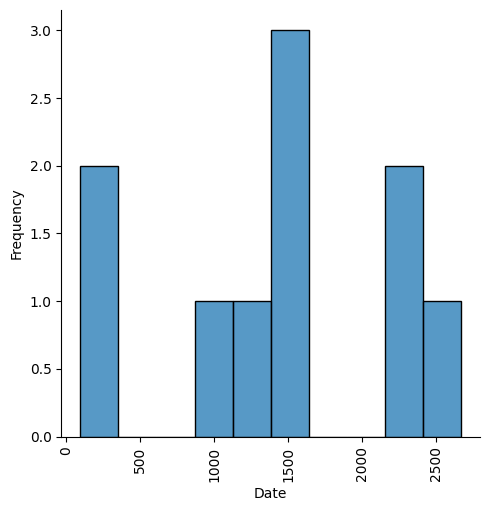

In [74]:
plt.figure(figsize=(10,10))
sns.displot(spray.Date.value_counts(), bins=10)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show();

## Summary & Next Step: 
Getting sufficient information into the data is important to understand and approach this tack.

With the given 4 datasets, we have carried out initial analysis on each of them and produced the summary and list of cleaning works to be done.
These include 
- dropping duplicate rows, 
- imputing missing and zero values, 
- splitting strings and replace with correct format, 
- change to right data types,
- dropping columns with high missing values
- create more interpretable features
